In [1]:
!pip install pyserial matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import serial
import threading
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

In [4]:
# CONFIGURA AQUÍ el puerto y la velocidad (= Serial.begin)
SERIAL_PORT = 'COM11'    # o '/dev/ttyUSB0' en Linux/Mac
BAUD_RATE   = 115200

ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    
line = ser.readline().decode(errors='ignore').strip()
parts = line.replace('V','').replace('Voltaje:','').replace('pH:','').split()

ser.close()

print(f"{parts}")

['oltaje:', '0.235', '|', '63.613']


deque([0.116], maxlen=100)


C:\Users\angel\AppData\Local\Temp\ipykernel_9500\3736327941.py:66: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)


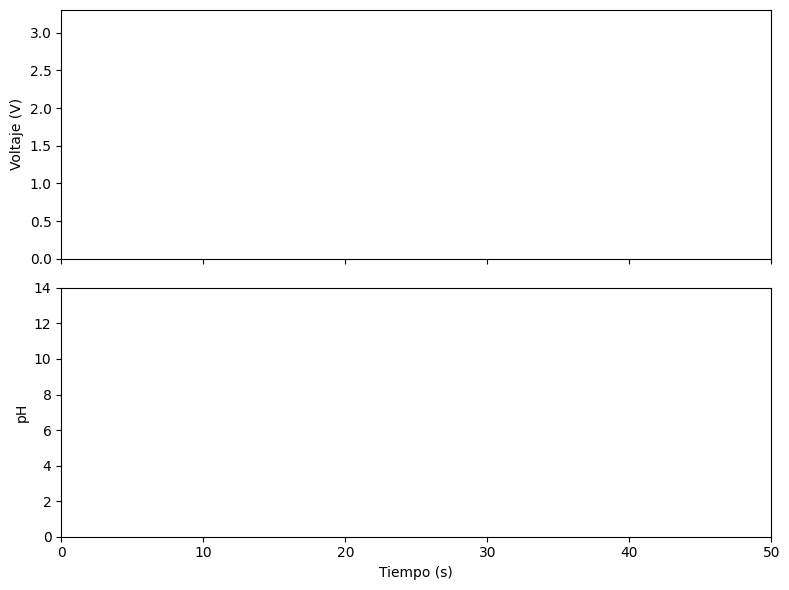

deque([0.116, 0.106], maxlen=100)
deque([0.116, 0.106, 0.09], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232, 0.232], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232, 0.232, 0.232], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232, 0.232, 0.232, 0.226], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232, 0.232, 0.232, 0.226, 0.216], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 0.203, 0.216, 0.232, 0.232, 0.232, 0.226, 0.216, 0.216], maxlen=100)
deque([0.116, 0.106, 0.09, 0.1, 0.135, 0.168, 

In [5]:
global ser

# Cuántos puntos guardamos en pantalla
MAX_POINTS = 100

# Colas para datos
times = deque(maxlen=MAX_POINTS)
voltajes = deque(maxlen=MAX_POINTS)
phs = deque(maxlen=MAX_POINTS)

# Marca de tiempo inicial
start_time = time.time()

def serial_reader():
    """Lee líneas del serial, parsea voltaje y pH."""
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    while True:
        line = ser.readline().decode(errors='ignore').strip()
        # Esperamos líneas como: "Voltaje: 2.345 V    pH: 6.78"
        if not line:
            continue
        try:
            # Separar por tabs o espacios
            parts = line.replace('V','').replace('Voltaje:','').replace('pH:','').split()
            v = float(parts[1])
            p = float(parts[3])
        except Exception:
            continue
        t = time.time() - start_time
        times.append(t)
        voltajes.append(v)
        phs.append(p)

        print(voltajes)

try:
    # Arrancamos el hilo de lectura serie
    thread = threading.Thread(target=serial_reader, daemon=True)
    thread.start()

    # Configuración de la figura
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    ax1.set_ylabel("Voltaje (V)")
    ax2.set_ylabel("pH")
    ax2.set_xlabel("Tiempo (s)")

    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    def init():
        ax1.set_xlim(0, MAX_POINTS * 0.5)
        ax1.set_ylim(0,  VREF := 3.3)     # Ajusta si tu VREF cambia
        ax2.set_ylim(0, 14)               # Rango típico de pH
        return line1, line2

    def update(frame):
        if times:
            # Ajusta eje X dinámico
            ax1.set_xlim(times[0], times[-1])
            ax2.set_xlim(times[0], times[-1])
            # Actualiza datos
            line1.set_data(times, voltajes)
            line2.set_data(times, phs)
        return line1, line2

    ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)

    plt.tight_layout()
    plt.show()
    # Mantener el hilo de lectura activo
    while thread.is_alive():
        time.sleep(1)
    print("Programa finalizado.")
except KeyboardInterrupt:
    print("Interrupción del usuario. Cerrando...")
    ser.close()

C:\Users\angel\AppData\Local\Temp\ipykernel_9500\1951999470.py:68: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)
Exception in thread Thread-6 (serial_reader):
Traceback (most recent call last):
  File "C:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 1041, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "C:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "C:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\threading.py", line 992, in run
    self._target(*self._args, **s

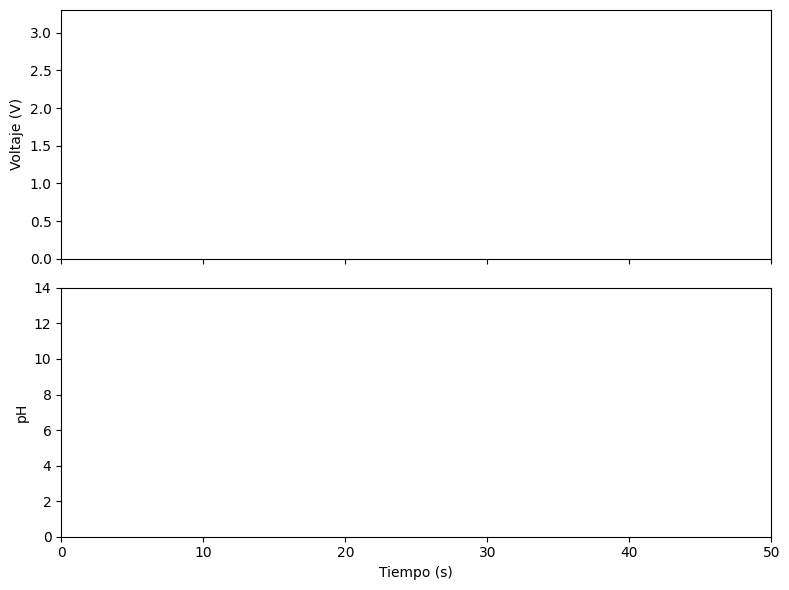

Programa finalizado.


In [9]:
import csv

start_time = time.time()

# Abrimos el archivo CSV
csv_file = open("datos_ph_voltaje.csv", "w", newline="")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Tiempo (s)", "Voltaje (V)", "pH"])  # Escribimos encabezados


def serial_reader():
    """Lee líneas del serial, parsea voltaje y pH y guarda en CSV."""
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    while True:
        line = ser.readline().decode(errors='ignore').strip()
        # Esperamos líneas como: "Voltaje: 2.345 V    pH: 6.78"
        if not line:
            continue
        try:
            # Limpiar y extraer valores
            parts = line.replace('V', '').replace('Voltaje:', '').replace('pH:', '').split()
            v = float(parts[1])
            p = float(parts[3])
        except Exception:
            continue
        t = time.time() - start_time
        times.append(t)
        voltajes.append(v)
        phs.append(p)

        # Guardar en el archivo CSV
        csv_writer.writerow([t, v, p])
        csv_file.flush()  # Asegura que se escriba inmediatamente

        print(f"Voltaje={v:.3f} V, pH={p:.2f}")


try:
    # Inicia el hilo que lee del puerto serial
    thread = threading.Thread(target=serial_reader, daemon=True)
    thread.start()

    # Configuración de la figura de Matplotlib
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
    ax1.set_ylabel("Voltaje (V)")
    ax2.set_ylabel("pH")
    ax2.set_xlabel("Tiempo (s)")

    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    def init():
        ax1.set_xlim(0, MAX_POINTS * 0.5)
        ax1.set_ylim(0, VREF := 3.3)  # Ajusta según tu referencia
        ax2.set_ylim(0, 14)           # Rango típico de pH
        return line1, line2

    def update(frame):
        if times:
            # Ajusta dinámicamente el eje X
            ax1.set_xlim(times[0], times[-1])
            ax2.set_xlim(times[0], times[-1])
            # Actualiza las curvas
            line1.set_data(times, voltajes)
            line2.set_data(times, phs)
        return line1, line2

    ani = animation.FuncAnimation(fig, update, init_func=init, blit=True, interval=200)

    plt.tight_layout()
    plt.show()

    # Mantiene el programa activo mientras el hilo corre
    while thread.is_alive():
        time.sleep(1)

    print("Programa finalizado.")

except KeyboardInterrupt:
    print("Interrupción del usuario. Cerrando...")
    csv_file.close()